In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from chart_studio.plotly import plot_mpl

In [2]:
data=pd.read_csv("dfp_cost.csv")

In [3]:
data.shape

(39, 14)

In [6]:
data.head()

,active_date,price0,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,price12
0,2018-06-08,9.2400,7.329,17.556,6.3890,5.2690,4.5620,17.1720,4.286,4.191,15.3510,4.054,3.989,11.7780
1,2018-06-09,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
2,2018-06-10,9.2400,7.385,17.556,6.4560,5.3380,4.6280,17.1720,4.351,4.257,15.3510,4.121,4.056,11.7780
3,2018-06-12,9.2055,7.351,17.524,6.4225,5.3035,4.6205,17.1395,4.403,4.324,15.3170,4.189,4.069,11.7450
4,2018-06-14,9.1390,7.284,17.461,6.3555,5.2370,4.6070,17.0735,4.403,4.324,15.2515,4.189,4.069,11.6785


In [9]:
df=data[['active_date','price0']]

In [11]:
df.head()

,active_date,price0
0,2018-06-08,9.2400
1,2018-06-09,9.2400
2,2018-06-10,9.2400
3,2018-06-12,9.2055
4,2018-06-14,9.1390


In [12]:
df.columns=['Date', 'Price']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,Price
Date,
2018-06-08,9.2400
2018-06-09,9.2400
2018-06-10,9.2400
2018-06-12,9.2055
2018-06-14,9.1390


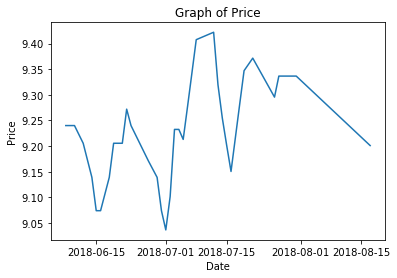

In [13]:
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Graph of Price")
plt.plot(df)

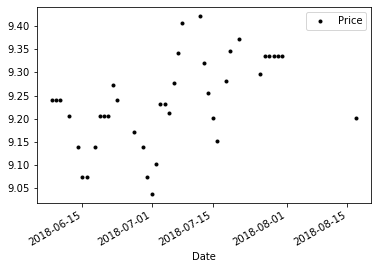

In [14]:
df.plot(style='k.')
plt.show()

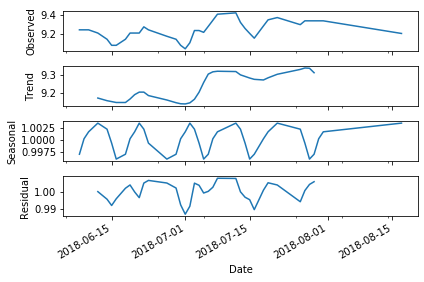

In [19]:
result = seasonal_decompose(df, model='multiplicative',freq=7)
result.plot()
plt.show()

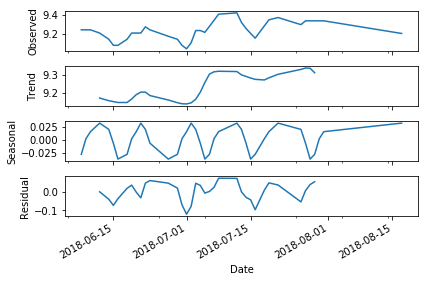

In [22]:
result = seasonal_decompose(df, model='additive',freq=7)
result.plot()
plt.show()

In [27]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Price'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

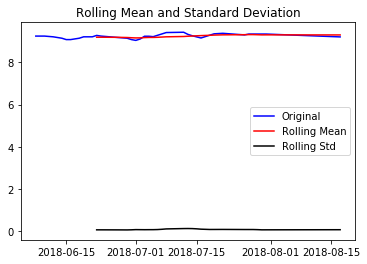

Results of dickey fuller test
Test Statistics                -3.010377
p-value                         0.033937
No. of lags used                1.000000
Number of observations used    37.000000
critical value (1%)            -3.620918
critical value (5%)            -2.943539
critical value (10%)           -2.610400
dtype: float64


In [28]:
test_stationarity(df)

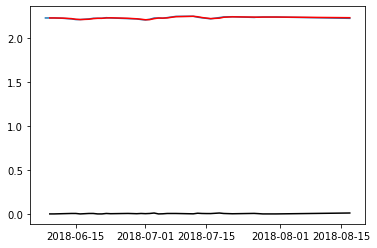

In [41]:
df_log = np.log(df)
moving_avg = df_log.rolling(2).mean()
std_dev = df_log.rolling(2).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

In [42]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

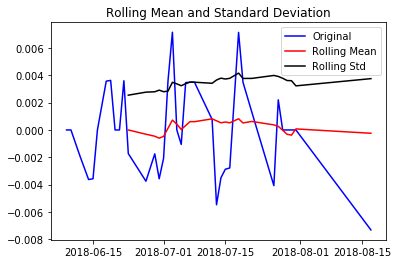

Results of dickey fuller test
Test Statistics                -3.781491
p-value                         0.003102
No. of lags used                0.000000
Number of observations used    37.000000
critical value (1%)            -3.620918
critical value (5%)            -2.943539
critical value (10%)           -2.610400
dtype: float64


In [43]:
test_stationarity(df_log_moving_avg_diff)

In [45]:
df_log_diff=df_log_moving_avg_diff

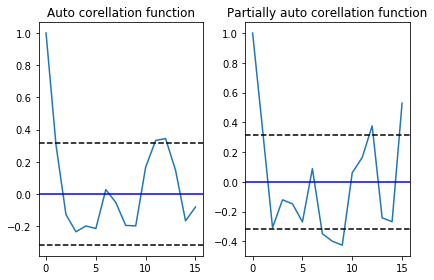

In [46]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


RSS : 0.000392


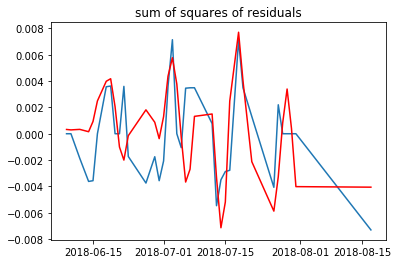

In [48]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Price"])**2))

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


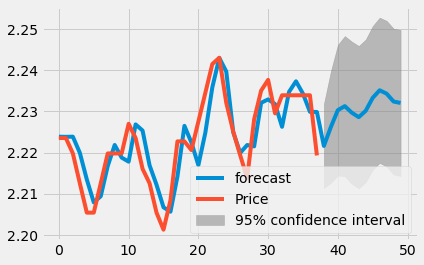

In [55]:
result_AR.plot_predict(1,50)
x=result_AR.forecast(steps=39)

In [54]:
#plt.style.use('fivethirtyeight')